<a href="https://colab.research.google.com/github/harikab5/MAIN-FLOW-DATASCIENCE-INTERNSHIP-TASK-5/blob/main/MAIN_FLOW_DATASCIENCE_TASK_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                      MAIN FLOW SERVICES AND TECHNOLOGIES
                      DATA SCIENCE WITH PYTHON INTERSHIP
                                 TASK-5

                      DESCRIPTION:
                      Engineer new features and select relevant
                      features for model training.

                      RESPONSIBILITY:
                      1.Generate meaningful features from existing
                        data.
                      2.Use techniques like PCA or feature
                        importance to select the most important
                        features.
                      3.Optimize feature sets for improved model
                        performance
    

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/heart.csv')

In [ ]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
df.columns.values


array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isna().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

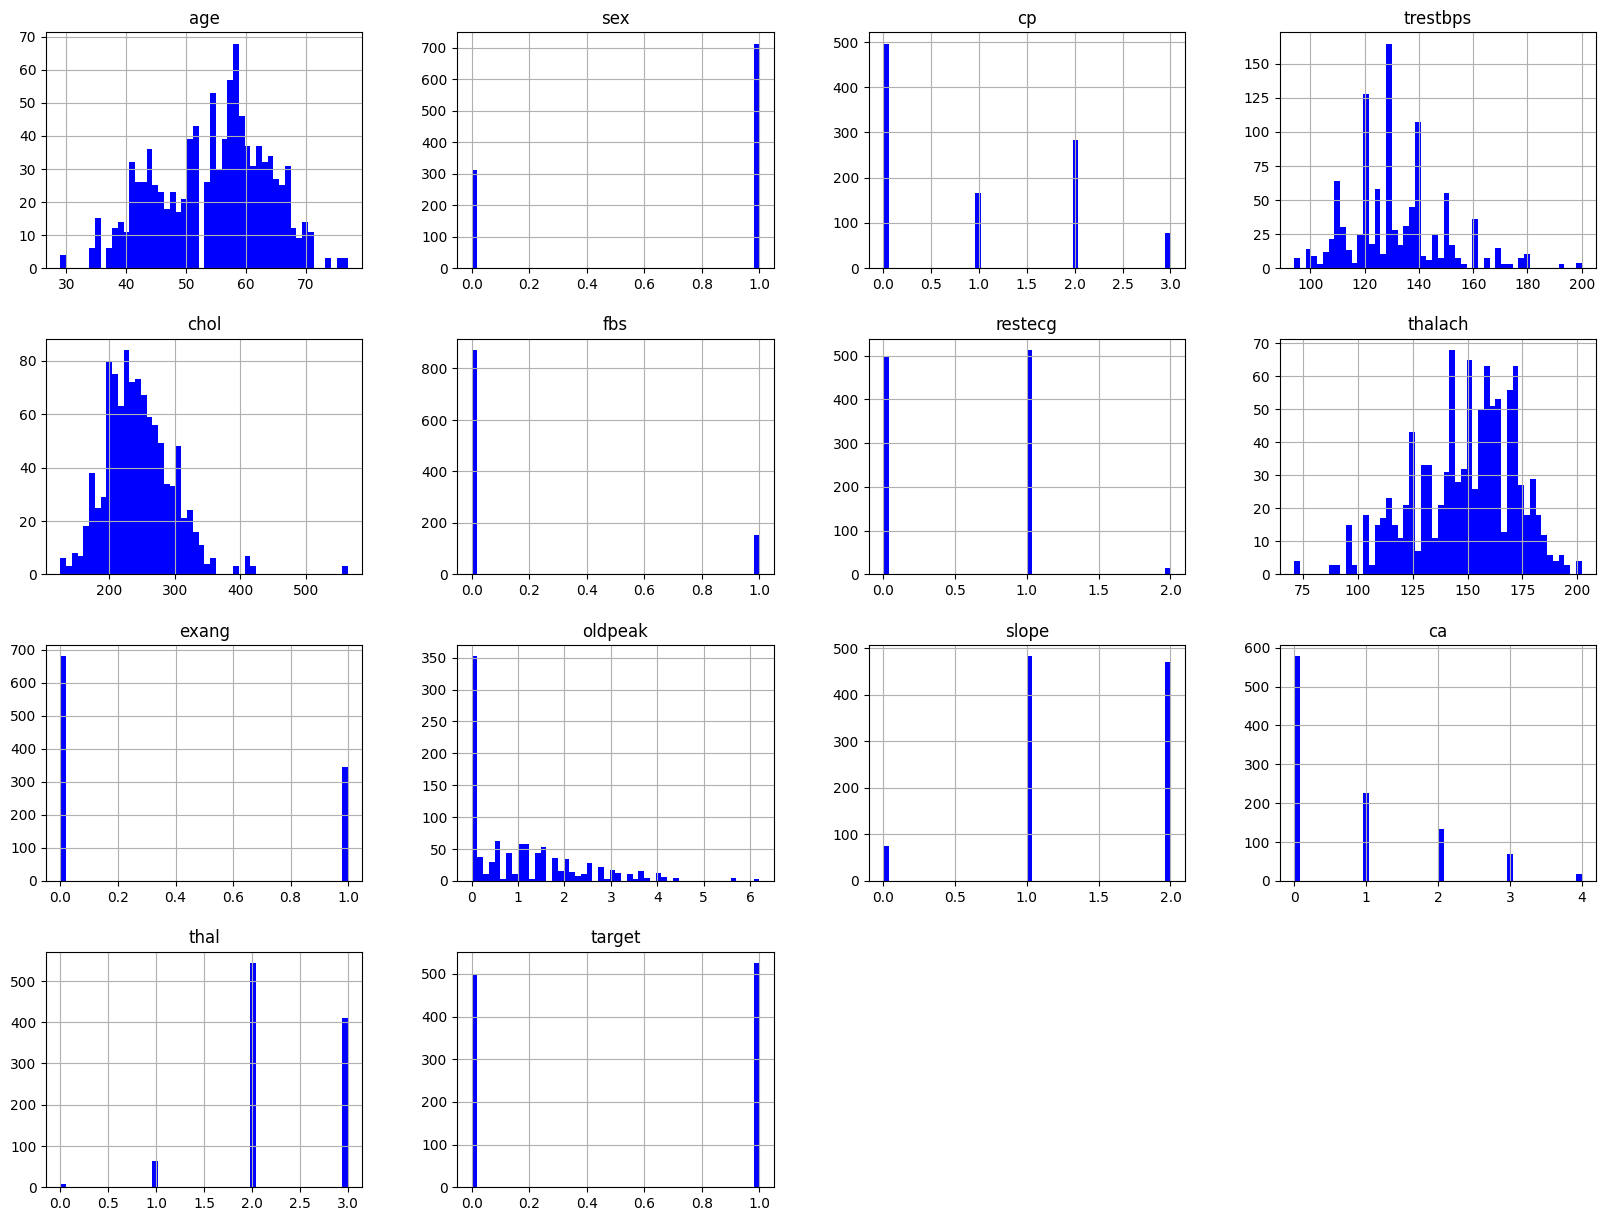

In [ ]:
df.hist(bins=50, grid=True, figsize=(20, 15),color='b')


In [ ]:
questions =["1.How many people have heart disease and how many people doesn't have heart disease? ",
            "2. People of which sex has most heart disease?",
            "3. People of which sex has which type of chest pain most?",
            "4. People with which chest pain are most pron to have heart disease?",
            "5. How does the resting blood pressure (trestbps) vary among individuals?",
            "6. How does thalach varies with different chest pain? ",
            "7. Derive the realtionship between gender and slope?"
            ]

questions

["1.How many people have heart disease and how many people doesn't have heart disease? ",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. People with which chest pain are most pron to have heart disease?',
 '5. How does the resting blood pressure (trestbps) vary among individuals?',
 '6. How does thalach varies with different chest pain? ',
 '7. Derive the realtionship between gender and slope?']

**1.How many people have heart disease and how many people doesn't have heart disease?**

In [ ]:
df.target.value_counts()


,count
target,
1,526
0,499


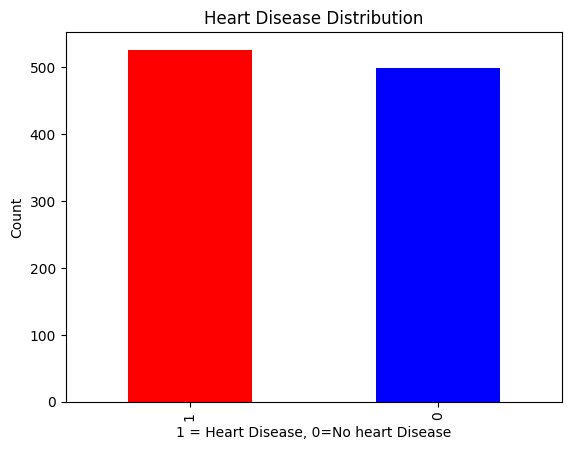

In [ ]:
df.target.value_counts().plot(kind = 'bar', color=["red", "blue"])
plt.title("Heart Disease Distribution")
plt.xlabel("1 = Heart Disease, 0=No heart Disease")
plt.ylabel("Count")
plt.show()

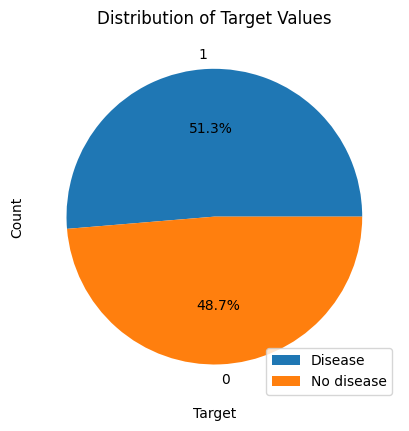

In [ ]:
#pie chart
df.target.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend(["Disease", "No disease"])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Values')
plt.show()


**526 people have heart disease
  499 people have no heart disease**

**2. People of which sex has most heart disease?**

In [ ]:
df.sex.value_counts()


,count
sex,
1,713
0,312


****

In [ ]:
pd.crosstab(df.target, df.sex)


sex,0,1
target,,
0,86,413
1,226,300


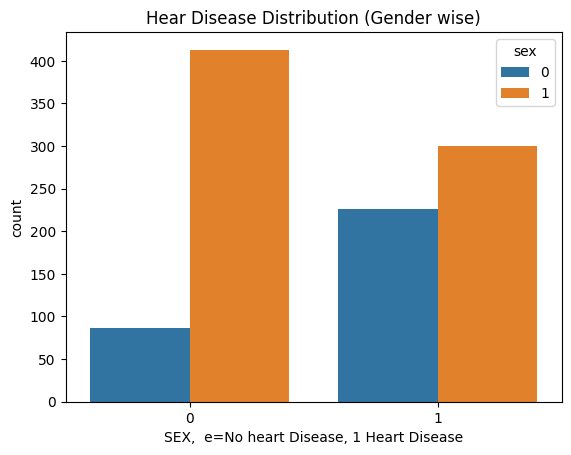

In [ ]:
sns.countplot(x = 'target', data = df, hue = 'sex')
plt.title("Hear Disease Distribution (Gender wise)")
plt.xlabel("SEX,  e=No heart Disease, 1 Heart Disease")
plt.show()


**Male have more heart disease**

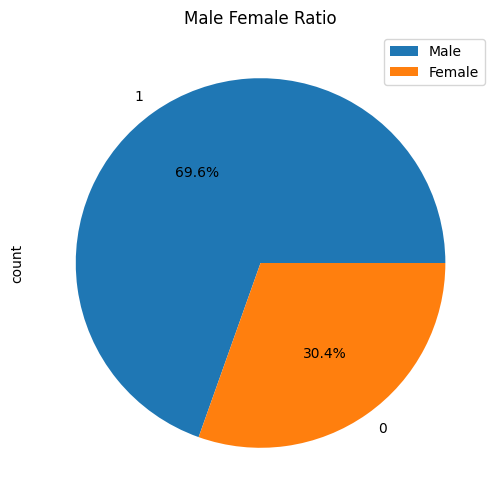

In [ ]:
#pie chart
df.sex.value_counts().plot(kind='pie', figsize=(8, 6), autopct='%1.1f%%')
plt.title('Male Female Ratio')
plt.legend(['Male', 'Female'], loc='upper right')
plt.show()


**3. People of which sex has which type of chest pain most?**

In [ ]:
df.cp.value_counts()


,count
cp,
0,497
2,284
1,167
3,77


In [ ]:
pd.crosstab(df.sex, df.cp)


cp,0,1,2,3
sex,,,,
0,133,57,109,13
1,364,110,175,64


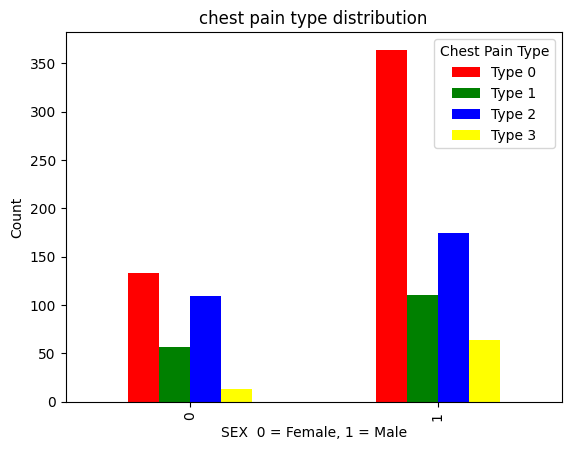

In [ ]:
pd.crosstab(df.sex, df.cp).plot(kind='bar', color=['red', 'green', 'blue', 'yellow'])
plt.title('chest pain type distribution')
plt.xlabel('SEX  0 = Female, 1 = Male')
plt.ylabel('Count')
plt.legend(['Type 0', 'Type 1', 'Type 2', 'Type 3'], title='Chest Pain Type')
plt.show()


 **BOTH FEMALE AND MALE HAVE MOSTLY 0 TYPE CHEST PAIN **

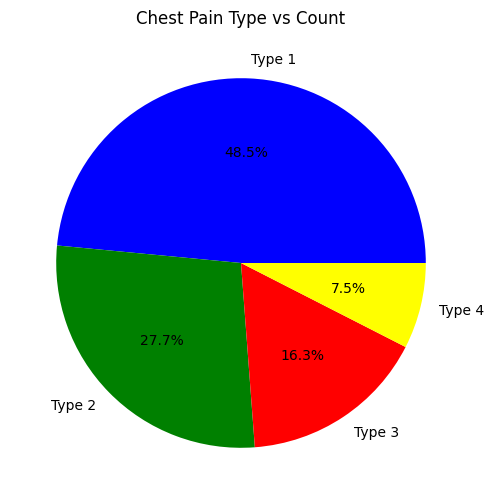

In [ ]:
#PIE CHART
df.cp.value_counts().plot(kind='pie', figsize=(8, 6), colors=['blue', 'green', 'red', 'yellow'], labels= ['Type 1' ,'Type 2','Type 3','Type 4'] ,autopct='%1.1f%%')
plt.title('Chest Pain Type vs Count')
plt.ylabel('')
plt.show()

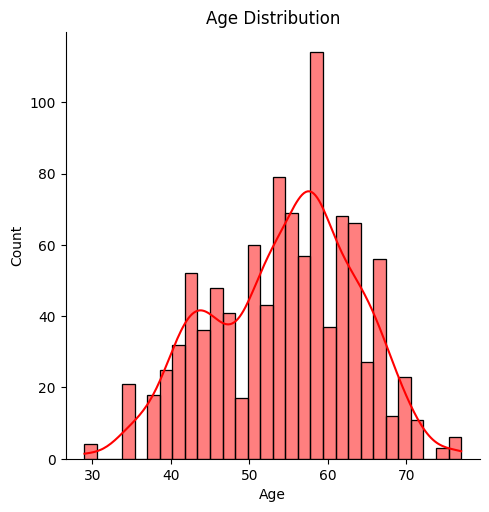

In [ ]:
sns.displot(x= 'age', data= df, bins=30, kde= 'True', color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


**4. People with which chest pain are most pron to have heart disease?**

In [ ]:
pd.crosstab(df.cp,df.target)


target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


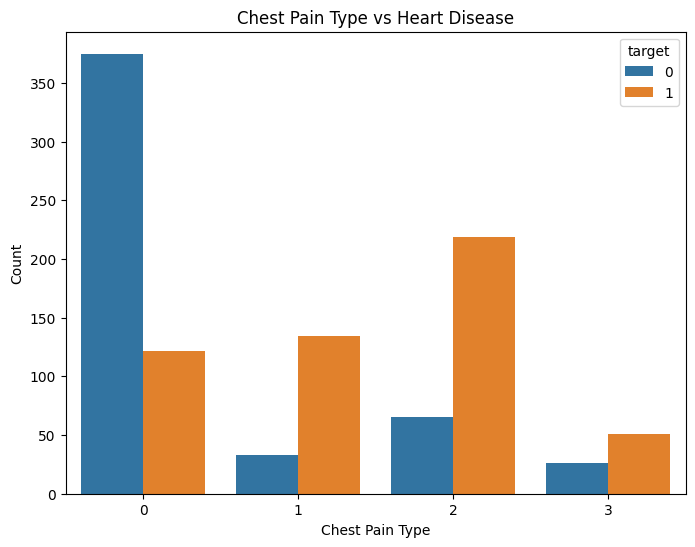

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x ='cp', data =df, hue ='target')
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

**chest pain type 2 have more heart disease**

**5. How does the resting blood pressure (trestbps) vary among individuals?**

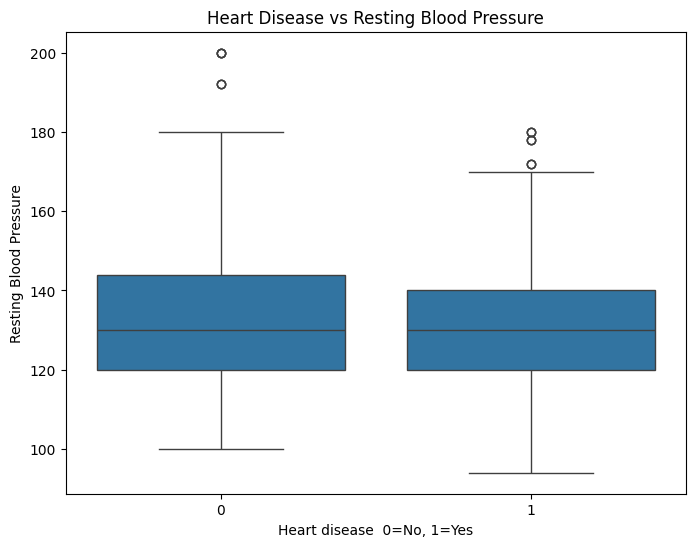

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='target', y='trestbps', data=df)
plt.title('Heart Disease vs Resting Blood Pressure')
plt.xlabel('Heart disease  0=No, 1=Yes')
plt.ylabel('Resting Blood Pressure')
plt.show()

**resting blood pressure is more for those who dont have heart disease**

**6. How does thalach varies with different chest pain?**

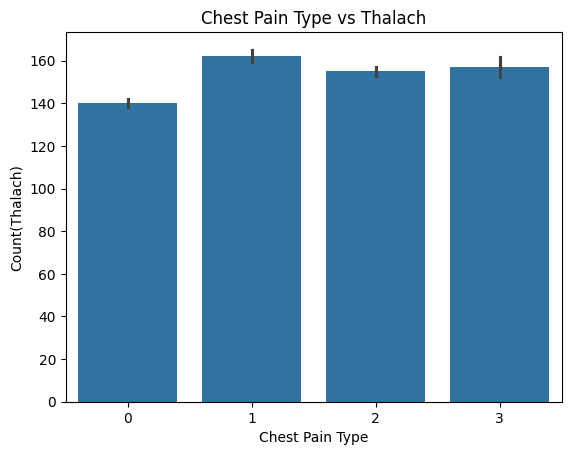

In [ ]:
sns.barplot(x='cp',y='thalach',data=df )
plt.title('Chest Pain Type vs Thalach')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count(Thalach)')
plt.show()



**there is no much effect of thalach on chest pain**

**7. Derive the realtionship between gender and slope?**

In [ ]:
pd.crosstab(df.sex,df.slope)


slope,0,1,2
sex,,,
0,17,150,145
1,57,332,324


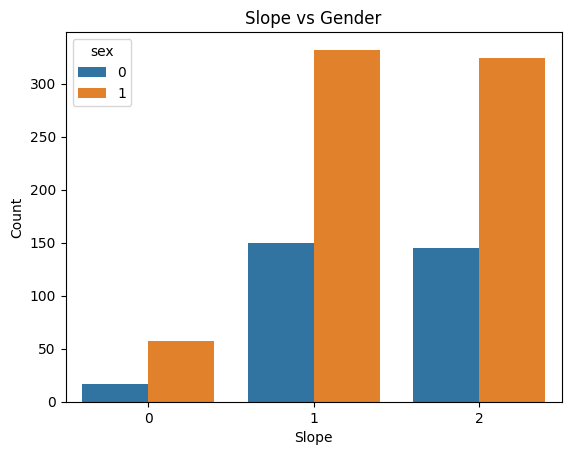

In [ ]:
sns.countplot(x='slope',data=df,hue='sex')
plt.title('Slope vs Gender')
plt.xlabel('Slope')
plt.ylabel('Count')
plt.show()